In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#data_exploration=pd.read_csv('./Downloads/LOL_Principal_3_0.csv')

In [4]:
import os

# Chemin du fichier
file_path = 'LOL_Principal_3.0.csv'

# Vérifie si le fichier existe
if os.path.isfile(file_path):
    data_exploration = pd.read_csv(file_path, low_memory=False)
    print("Fichier chargé avec succès !")
else:
    print(f"Erreur : le fichier '{file_path}' n'a pas été trouvé.")

Fichier chargé avec succès !


In [5]:
data_exploration.head(5)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8
0,0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder', 'Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",1,Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN
1,1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand', 'Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']",Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,4,6,47,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']","['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']",2,Karma,Alistar,Aurelion Sol,Mordekaiser,Zoé,Pyke,K'Santé,Twitch,Brand,Hwei,0,1,NaN
2,2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna', 'Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']",Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,4,4,20,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']","['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']",1,Twisted Fate,Cassiopeia,Kha'Zix,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN
3,3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus', 'Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']",Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,4,1,7,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']","['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']",2,Rumble,Udyr,Nidalee,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN
4,4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan', 'Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']",Tueur de krakens,Salutations de Dominik,Jambières du berzerker,Lame de Doran,Cape dagilité,Pioche,Altération divinatoire,3,7,6,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan']","['Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']",2,Nidalee,Tristana,Jarvan IV,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN


In [6]:
data_exploration.shape

(99671, 36)

In [7]:
data_exploration=data_exploration.drop('Noms héros', axis=1)

In [8]:
data_verif=pd.read_csv('./Downloads/Correc_V2.csv')
data_verif.head(1)

FileNotFoundError: [Errno 2] No such file or directory: './Downloads/Correc_V2.csv'

In [9]:
def winner(data_exploration):
    name=data_exploration['Champion']
    Equipe_1=data_exploration['Équipe 1']
    res=data_exploration['Résultat']
    
    if (res==1):
        if (name in Equipe_1):  
            return 1
        else : 
            return 0
    else :
         if (name in Equipe_1):  
            return 0
         else : 
            return 1

In [10]:
data_exploration['winner']=data_exploration.apply(winner, axis=1)

In [11]:
data_exploration.head(5)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner
0,0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",1,Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN,1
1,1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,4,6,47,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']","['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']",2,Karma,Alistar,Aurelion Sol,Mordekaiser,Zoé,Pyke,K'Santé,Twitch,Brand,Hwei,0,1,NaN,0
2,2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,4,4,20,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']","['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']",1,Twisted Fate,Cassiopeia,Kha'Zix,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN,1
3,3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,4,1,7,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']","['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']",2,Rumble,Udyr,Nidalee,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN,0
4,4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,Jambières du berzerker,Lame de Doran,Cape dagilité,Pioche,Altération divinatoire,3,7,6,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan']","['Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']",2,Nidalee,Tristana,Jarvan IV,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN,1


In [12]:
data_exploration_double=data_exploration

In [13]:
data_exploration_double.head(1)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner
0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",1,Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN,1


In [14]:
data_exploration_double['tmp']=data_exploration_double['Équipe 2']

In [15]:
data_exploration_double['Équipe 2']=data_exploration_double['Équipe 1']
data_exploration_double.head(1)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner,tmp
0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",1,Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN,1,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']"


In [16]:
data_exploration_double['Équipe 1']=data_exploration_double['tmp']
data_exploration_double.head(1)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner,tmp
0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",1,Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN,1,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']"


In [17]:
data_exploration_double['tmp']=data_exploration_double['Équipe 1 Champion 1']
data_exploration_double['Équipe 1 Champion 1']=data_exploration_double['Équipe 2 Champion 1']
data_exploration_double['Équipe 2 Champion 1']=data_exploration_double['tmp']
data_exploration_double.head(1)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner,tmp
0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",1,Xerath,Yuumi,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN,1,Yuumi


In [18]:
data_exploration_double['tmp']=data_exploration_double['Équipe 1 Champion 2']
data_exploration_double['Équipe 1 Champion 2']=data_exploration_double['Équipe 2 Champion 2']
data_exploration_double['Équipe 2 Champion 2']=data_exploration_double['tmp']

data_exploration_double['tmp']=data_exploration_double['Équipe 1 Champion 3']
data_exploration_double['Équipe 1 Champion 3']=data_exploration_double['Équipe 2 Champion 3']
data_exploration_double['Équipe 2 Champion 3']=data_exploration_double['tmp']

data_exploration_double['tmp']=data_exploration_double['Équipe 1 Champion 4']
data_exploration_double['Équipe 1 Champion 4']=data_exploration_double['Équipe 2 Champion 4']
data_exploration_double['Équipe 2 Champion 4']=data_exploration_double['tmp']

data_exploration_double['tmp']=data_exploration_double['Équipe 1 Champion 5']
data_exploration_double['Équipe 1 Champion 5']=data_exploration_double['Équipe 2 Champion 5']
data_exploration_double['Équipe 2 Champion 5']=data_exploration_double['tmp']

data_exploration_double.head(1)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner,tmp
0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",1,Xerath,Yuumi,Miss Fortune,Shen,Pantheon,Janna,Aatrox,Ekko,Twitch,Smolder,2,0,NaN,1,Smolder


In [19]:
def switch_equipe (data_exploration_double):
    equipe=data_exploration_double['Équipe']
    if equipe==2 : 
        return 1
    else : 
        return 2

In [20]:
data_exploration_double['Équipe']=data_exploration_double.apply(switch_equipe, axis=1)

In [21]:
data_exploration_double.head(5)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner,tmp
0,0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",2,Xerath,Yuumi,Miss Fortune,Shen,Pantheon,Janna,Aatrox,Ekko,Twitch,Smolder,2,0,NaN,1,Smolder
1,1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,4,6,47,"['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']","['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']",1,Alistar,Karma,Mordekaiser,Aurelion Sol,Pyke,Zoé,Twitch,K'Santé,Hwei,Brand,0,1,NaN,0,Brand
2,2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,4,4,20,"['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']","['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']",2,Cassiopeia,Twisted Fate,Vi,Kha'Zix,Yone,Azir,Yasuo,Tahm Kench,Nautilus,Senna,0,1,NaN,1,Senna
3,3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,4,1,7,"['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']","['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']",1,Udyr,Rumble,Xin Zhao,Nidalee,Vel'Koz,Yone,Jinx,Samira,Braum,Nautilus,1,0,NaN,0,Nautilus
4,4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,Jambières du berzerker,Lame de Doran,Cape dagilité,Pioche,Altération divinatoire,3,7,6,"['Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']","['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan']",1,Tristana,Nidalee,Udyr,Jarvan IV,Irelia,Akali,Jinx,Ezreal,Nautilus,Rakan,1,1,NaN,1,Rakan


In [22]:
def switch_win (data_exploration_double):
    win=data_exploration_double['winner']
    if win==1 : 
        return 0
    else :
        return 1 


In [23]:
data_exploration_double['winner']=data_exploration_double.apply(switch_win, axis=1)
data_exploration_double.head(5)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner,tmp
0,0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",2,Xerath,Yuumi,Miss Fortune,Shen,Pantheon,Janna,Aatrox,Ekko,Twitch,Smolder,2,0,NaN,0,Smolder
1,1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,4,6,47,"['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']","['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']",1,Alistar,Karma,Mordekaiser,Aurelion Sol,Pyke,Zoé,Twitch,K'Santé,Hwei,Brand,0,1,NaN,1,Brand
2,2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,4,4,20,"['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']","['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']",2,Cassiopeia,Twisted Fate,Vi,Kha'Zix,Yone,Azir,Yasuo,Tahm Kench,Nautilus,Senna,0,1,NaN,0,Senna
3,3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,4,1,7,"['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']","['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']",1,Udyr,Rumble,Xin Zhao,Nidalee,Vel'Koz,Yone,Jinx,Samira,Braum,Nautilus,1,0,NaN,1,Nautilus
4,4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,Jambières du berzerker,Lame de Doran,Cape dagilité,Pioche,Altération divinatoire,3,7,6,"['Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']","['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan']",1,Tristana,Nidalee,Udyr,Jarvan IV,Irelia,Akali,Jinx,Ezreal,Nautilus,Rakan,1,1,NaN,0,Rakan


In [24]:
data_exploration_double.to_csv('LOL_Principal_double.csv')

In [25]:
df_1 = pd.read_csv('LOL_Principal_3.0.csv', low_memory=False, error_bad_lines=False, warn_bad_lines=True)
df_2=pd.read_csv('LOL_Principal_double.csv', low_memory=False)

/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_31621/2882193614.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_1 = pd.read_csv('LOL_Principal_3.0.csv', low_memory=False, error_bad_lines=False, warn_bad_lines=True)
/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_31621/2882193614.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_1 = pd.read_csv('LOL_Principal_3.0.csv', low_memory=False, error_bad_lines=False, warn_bad_lines=True)


In [26]:
df_1.head(1)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8
0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder', 'Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",1,Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN


In [27]:
#df_1.shape, df_2.shape

In [28]:
df_2.head(1)

,Unnamed: 0.1,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner,tmp
0,0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",2,Xerath,Yuumi,Miss Fortune,Shen,Pantheon,Janna,Aatrox,Ekko,Twitch,Smolder,2,0,NaN,0,Smolder


In [29]:
df_2=df_2.drop(['tmp', 'Unnamed: 0.1'], axis=1)
df_2.head(1)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner
0,0,1,26.2,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",2,Xerath,Yuumi,Miss Fortune,Shen,Pantheon,Janna,Aatrox,Ekko,Twitch,Smolder,2,0,NaN,0


In [30]:
df_1['winner']=df_1.apply(winner, axis=1)


In [31]:
df_1=df_1.drop('Noms héros', axis=1)

In [32]:
df_1.shape, df_2.shape

((99671, 36), (99671, 36))

In [33]:
total_data= pd.concat([df_1, df_2], ignore_index=True)
total_data.shape

(199342, 36)

In [34]:
total_data.head(5)

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner
0,0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",1,Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN,1
1,1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,4,6,47,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']","['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']",2,Karma,Alistar,Aurelion Sol,Mordekaiser,Zoé,Pyke,K'Santé,Twitch,Brand,Hwei,0,1,NaN,0
2,2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,4,4,20,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']","['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']",1,Twisted Fate,Cassiopeia,Kha'Zix,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN,1
3,3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,4,1,7,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']","['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']",2,Rumble,Udyr,Nidalee,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN,0
4,4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,Jambières du berzerker,Lame de Doran,Cape dagilité,Pioche,Altération divinatoire,3,7,6,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan']","['Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']",2,Nidalee,Tristana,Jarvan IV,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN,1


In [35]:
total_data.iloc[99669:99675,:]

,Unnamed: 0,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Kill,Death,Assist,Équipe 1,Équipe 2,Équipe,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,winner
99669,117100,0,21.833333,Rumble,0.33,Grandmaster,1.67:1,Match classé Solo,NaN,Chaussures de sorcier,Ceinture-roquette Hextech,Tourment de Liandry,Baguette trop grosse,Brouilleur oraculaire,NaN,NaN,2,3,3,"['Pantheon', 'Brand', 'Rumble', ""Kai'Sa"", 'Pyke']","[""K'Santé"", ""Bel'Veth"", 'Azir', 'Ezreal', 'Milio']",1,Pantheon,K'Santé,Brand,Bel'Veth,Rumble,Azir,Kai'Sa,Ezreal,Pyke,Milio,0,0,NaN,0
99670,117101,1,16.366667,Gwen,0.29,Grandmaster,6.00:1,Match classé Solo,NaN,Bottes de lucidité,Créateur de failles,Anneau de Doran,Codex méphitique,Dague,Balise camouflée,NaN,4,1,2,"['Ornn', 'Graves', 'Lux', 'Jinx', 'Lulu']","['Gwen', 'Volibear', 'LeBlanc', 'Draven', 'Janna']",2,Ornn,Gwen,Graves,Volibear,Lux,LeBlanc,Jinx,Draven,Lulu,Janna,0,0,NaN,0
99671,0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,1,12,57,"['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']","['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']",2,Xerath,Yuumi,Miss Fortune,Shen,Pantheon,Janna,Aatrox,Ekko,Twitch,Smolder,2,0,NaN,0
99672,1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,4,6,47,"['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']","['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']",1,Alistar,Karma,Mordekaiser,Aurelion Sol,Pyke,Zoé,Twitch,K'Santé,Hwei,Brand,0,1,NaN,1
99673,2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,4,4,20,"['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']","['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']",2,Cassiopeia,Twisted Fate,Vi,Kha'Zix,Yone,Azir,Yasuo,Tahm Kench,Nautilus,Senna,0,1,NaN,0
99674,3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,4,1,7,"['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']","['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']",1,Udyr,Rumble,Xin Zhao,Nidalee,Vel'Koz,Yone,Jinx,Samira,Braum,Nautilus,1,0,NaN,1


In [36]:
categorial_df=total_data.select_dtypes(exclude=np.number)
numerical_df=total_data.select_dtypes(include=np.number)


In [37]:
categorial_df.shape, numerical_df.shape

((199342, 25), (199342, 11))

In [38]:
categorial_df.head(1)

,Champion,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Équipe 1,Équipe 2,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Item 8
0,Janna,Emerald 4,4.83:1,ARAM,NaN,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,NaN


In [39]:
categorial_df=categorial_df.drop(['Item 8', 'Tags'], axis=1)

In [40]:
numerical_df=numerical_df.drop('Unnamed: 0', axis=1)

In [41]:
numerical_df.head(1)

,Résultat,Durée,Contribution,Kill,Death,Assist,Équipe,Fort,Faible,winner
0,1,26.2,0.74,1,12,57,1,2,0,1


In [42]:
categorial_df.columns

Index(['Champion', 'Rang', 'KDA ratio', 'Type de jeu', 'Item 1', 'Item 2',
       'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Équipe 1',
       'Équipe 2', 'Équipe 1 Champion 1', 'Équipe 2 Champion 1',
       'Équipe 1 Champion 2', 'Équipe 2 Champion 2', 'Équipe 1 Champion 3',
       'Équipe 2 Champion 3', 'Équipe 1 Champion 4', 'Équipe 2 Champion 4',
       'Équipe 1 Champion 5', 'Équipe 2 Champion 5'],
      dtype='object')

In [43]:
pd.unique(categorial_df['Champion'])

array(['Janna', 'Alistar', 'Tahm Kench', 'Jinx', 'Zeri', 'Malphite',
       'Kalista', 'Aphelios', 'Vayne', "Kai'Sa", 'Samira', 'Lucian', 'Vi',
       'Xayah', 'Sivir', 'Skarner', 'Draven', 'Fiddlesticks', 'Xin Zhao',
       'Teemo', 'Aurelion Sol', 'Neeko', 'Caitlyn', 'Ashe', 'Tristana',
       'Nautilus', 'Smolder', 'Varus', 'Senna', 'Ezreal', 'Qiyana',
       'Lee Sin', 'Hwei', 'Jhin', 'Akali', 'Renata Glasc', 'Sejuani',
       'Rakan', 'Camille', 'Blitzcrank', 'Bard', 'Nami', 'Lulu', 'Milio',
       'Rell', 'Pyke', 'Thresh', 'Séraphine', 'Leona', 'Rumble', 'Braum',
       'Soraka', 'Amumu', 'Maokai', 'Jax', 'Sion', 'Gragas', 'Aatrox',
       'Jayce', "K'Santé", 'Zac', 'Olaf', 'Renekton', 'Udyr', 'Ivern',
       'Twisted Fate', "Rek'Sai", 'Gwen', 'Volibear', 'Ornn', 'Yone',
       'Poppy', 'Gnar', 'Karma', 'Twitch', 'Yasuo', "Kog'Maw", 'Vladimir',
       'Nilah', 'Taliyah', 'Irelia', 'Ryze', 'Galio', 'Azir', 'Orianna',
       'Veigar', 'Ahri', 'Annie', 'Sylas', 'Kindred', 'Syndra', 

In [44]:
pd.unique(categorial_df['Rang'])

array(['Emerald 4', 'Diamond 2', 'Grandmaster', 'Challenger', 'Master',
       'Diamond 1', 'Emerald 1', 'Diamond 4', 'Emerald 2', 'Emerald 3',
       'Diamond 3', 'Platinum 2', 'Gold 1', 'Platinum 1', 'Platinum 3',
       'Gold 3', 'Gold 2', 'Platinum 4', 'Silver 1', 'Gold 4', 'Silver 2',
       'Silver 3', 'Silver 4', 'Bronze 2'], dtype=object)

In [45]:
def silver (categorial_df):
    rang=categorial_df['Rang']
    if(rang==['Silver 2','Silver 1']):
        return 1
    else :
        return 0
def Diamond (categorial_df):
    rang=categorial_df['Rang']
    if(rang in['Diamond 2','Diamond 1', 'Diamond 4','Diamond 3']):
        return 1
    else :
        return 0
    
def Emerald (categorial_df):
    rang=categorial_df['Rang']
    if(rang in ['Emerald 2','Emerald 1', 'Emerald 3']):
        return 1
    else :
        return 0
    
def Platinum (categorial_df):
    rang=categorial_df['Rang']
    if(rang in['Platinum 2','Platinum 1','Platinum 3', 'Platinum 4']):
        return 1
    else :
        return 0
    
def Gold (categorial_df):
    rang=categorial_df['Rang']
    if(rang in ['Gold 3','Gold 1','Gold 2', 'Gold 4']):
        return 1
    else :
        return 0
    
def Master (categorial_df):
    rang=categorial_df['Rang']
    if(rang in['Master']):
        return 1
    else :
        return 0
    
def Challenger (categorial_df):
    rang=categorial_df['Rang']
    if(rang in ['Challenger']):
        return 1
    else :
        return 0
    
def Grandmaster (categorial_df):
    rang=categorial_df['Rang']
    if(rang=='Grandmaster'):
        return 1
    else :
        return 0
    

In [46]:
categorial_df['silver']=categorial_df.apply(silver, axis=1)


In [47]:
categorial_df['Diamond']=categorial_df.apply(Diamond, axis=1)
categorial_df['Emerald']=categorial_df.apply(Emerald, axis=1)
categorial_df['Platinum']=categorial_df.apply(Platinum, axis=1)
categorial_df['Gold']=categorial_df.apply(Gold, axis=1)
categorial_df['Master']=categorial_df.apply(Master, axis=1)
categorial_df['Challenger']=categorial_df.apply(Challenger, axis=1)
categorial_df['Grandmaster']=categorial_df.apply(Grandmaster, axis=1)


In [48]:
categorial_df

,Champion,Rang,KDA ratio,Type de jeu,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Équipe 1,Équipe 2,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,silver,Diamond,Emerald,Platinum,Gold,Master,Challenger,Grandmaster
0,Janna,Emerald 4,4.83:1,ARAM,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",Yuumi,Xerath,Shen,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,0,0,0,0,0,0,0,0
1,Alistar,Diamond 2,8.50:1,ARAM,Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']","['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']",Karma,Alistar,Aurelion Sol,Mordekaiser,Zoé,Pyke,K'Santé,Twitch,Brand,Hwei,0,1,0,0,0,0,0,0
2,Tahm Kench,Grandmaster,6.00:1,Match classé Solo,Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']","['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']",Twisted Fate,Cassiopeia,Kha'Zix,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,0,0,0,0,0,0,1
3,Jinx,Challenger,11.00:1,Match classé Solo,Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']","['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']",Rumble,Udyr,Nidalee,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,0,0,0,0,0,0,1,0
4,Jinx,Grandmaster,1.29:1,Match classé Solo,Tueur de krakens,Salutations de Dominik,Jambières du berzerker,Lame de Doran,Cape dagilité,Pioche,Altération divinatoire,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan']","['Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']",Nidalee,Tristana,Jarvan IV,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199337,Zilean,Master,0.50:1,Match classé Solo,Bottes de lucidité,Opposition céleste,Codex méphitique,Miroir en verre de Bandle,Brouilleur oraculaire,NaN,NaN,"['Pantheon', 'Maître Yi', 'Akali', 'Caitlyn', 'Zilean']","['Gragas', ""Bel'Veth"", 'Fizz', 'Lucian', 'Milio']",Pantheon,Gragas,Maître Yi,Bel'Veth,Akali,Fizz,Caitlyn,Lucian,Zilean,Milio,0,0,0,0,0,1,0,0
199338,Zilean,Master,Perfect,Match classé Solo,Sandales de Mercure,Trésor des mondes,Mandat impérial,Tome damplification,Tome damplification,Brouilleur oraculaire,NaN,"['Camille', 'Zac', ""Vel'Koz"", 'Smolder', 'Zilean']","['Garen', 'Evelynn', 'Syndra', 'Varus', 'Nautilus']",Camille,Garen,Zac,Evelynn,Vel'Koz,Syndra,Smolder,Varus,Zilean,Nautilus,0,0,0,0,0,1,0,0
199339,Skarner,Grandmaster,7.33:1,Match classé Solo,Coques en acier,Vœu du chevalier,Balise de contrôle,Cœuracier,Cotte épineuse,Cendres de Bami,Brouilleur oraculaire,"['Aatrox', 'Olaf', 'LeBlanc', 'Yasuo', 'Thresh']","['Gnar', 'Skarner', 'Brand', 'Aphelios', 'Janna']",Aatrox,Gnar,Olaf,Skarner,LeBlanc,Brand,Yasuo,Aphelios,Thresh,Janna,0,0,0,0,0,0,0,1
199340,Rumble,Grandmaster,1.67:1,Match classé Solo,Chaussures de sorcier,Ceinture-roquette Hextech,Tourment de Liandry,Baguette trop grosse,Brouilleur oraculaire,NaN,NaN,"[""K'Santé"", ""Bel'Veth"", 'Azir', 'Ezreal', 'Milio']","['Pantheon', 'Brand', 'Rumble', ""Kai'Sa"", 'Pyke']",K'Santé,Pantheon,Bel'Veth,Brand,Azir,Rumble,Ezreal,Kai'Sa,Milio,Pyke,0,0,0,0,0,0,0,1


In [49]:
#categorial_df.drop(['Rang', 'KDA ratio','Item 1','Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7'], axis=1)

In [50]:
pd.unique(categorial_df['Type de jeu'])

array(['ARAM', 'Match classé Solo', 'Clash', 'Normal', 'Un pour tous',
       'Ultra Rapid Fire', 'Flex 5:5 Rank', 'Partie rapide',
       'Nouveau : Intermédiaire', 'Personnalisé', 'Débutant', 'Intro'],
      dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder

labels_champion_1_1 = categorial_df['Équipe 1 Champion 1']
label_encoder_champion1_1 = LabelEncoder()
label_encoder_champion1_1.fit(labels_champion_1_1)
categorial_df['Équipe 1 Champion 1'] = label_encoder_champion1_1.transform(labels_champion_1_1)

labels_champion_2_1 = categorial_df['Équipe 2 Champion 1']
label_encoder_champion2_1 = LabelEncoder()
label_encoder_champion2_1.fit(labels_champion_2_1)
categorial_df['Équipe 2 Champion 1'] = label_encoder_champion2_1.transform(labels_champion_2_1)

labels_champion_1_2 = categorial_df['Équipe 1 Champion 2']
label_encoder_champion1_2 = LabelEncoder()
label_encoder_champion1_2.fit(labels_champion_1_2)
categorial_df['Équipe 1 Champion 2'] = label_encoder_champion1_2.transform(labels_champion_1_2)

labels_champion_2_2 = categorial_df['Équipe 2 Champion 2']
label_encoder_champion2_2 = LabelEncoder()
label_encoder_champion2_2.fit(labels_champion_2_2)
categorial_df['Équipe 2 Champion 2'] = label_encoder_champion2_2.transform(labels_champion_2_2)

labels_champion_1_3 = categorial_df['Équipe 1 Champion 3']
label_encoder_champion1_3 = LabelEncoder()
label_encoder_champion1_3.fit(labels_champion_1_3)
categorial_df['Équipe 1 Champion 3'] = label_encoder_champion1_3.transform(labels_champion_1_3)

labels_champion_2_3 = categorial_df['Équipe 2 Champion 3']
label_encoder_champion2_3 = LabelEncoder()
label_encoder_champion2_3.fit(labels_champion_2_3)
categorial_df['Équipe 2 Champion 3'] = label_encoder_champion2_3.transform(labels_champion_2_3)

labels_champion_1_4 = categorial_df['Équipe 1 Champion 4']
label_encoder_champion1_4 = LabelEncoder()
label_encoder_champion1_4.fit(labels_champion_1_4)
categorial_df['Équipe 1 Champion 4'] = label_encoder_champion1_4.transform(labels_champion_1_4)

labels_champion_2_4 = categorial_df['Équipe 2 Champion 4']
label_encoder_champion2_4 = LabelEncoder()
label_encoder_champion2_4.fit(labels_champion_2_4)
categorial_df['Équipe 2 Champion 4'] = label_encoder_champion2_4.transform(labels_champion_2_4)

labels_champion_1_5 = categorial_df['Équipe 1 Champion 5']
label_encoder_champion1_5 = LabelEncoder()
label_encoder_champion1_5.fit(labels_champion_1_5)
categorial_df['Équipe 1 Champion 5'] = label_encoder_champion1_5.transform(labels_champion_1_5)

labels_champion_2_5 = categorial_df['Équipe 2 Champion 5']
label_encoder_champion2_5 = LabelEncoder()
label_encoder_champion2_5.fit(labels_champion_2_5)
categorial_df['Équipe 2 Champion 5'] = label_encoder_champion2_5.transform(labels_champion_2_5)

categorial_df.head(5)

/Users/elisajh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Champion,Rang,KDA ratio,Type de jeu,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Équipe 1,Équipe 2,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,silver,Diamond,Emerald,Platinum,Gold,Master,Challenger,Grandmaster
0,Janna,Emerald 4,4.83:1,ARAM,Régénérateur de pierre de lune,Bénédiction de Mikael,Rédemption,Bâton des flots,Bottes de lucidité,Cœur de laube,Poro-Snax,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder']","['Xerath', 'Miss Fortune', 'Pantheon', 'Aatrox', 'Twitch']",159,154,115,80,47,95,27,0,121,138,0,0,0,0,0,0,0,0
1,Alistar,Diamond 2,8.50:1,ARAM,Corne du gardien,Sandales de Mercure,Cœuracier,Rookern kaénique,Manteau de Négatron,Gemme exaltante,Poro-Snax,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'Brand']","['Alistar', 'Mordekaiser', 'Pyke', 'Twitch', 'Hwei']",56,4,10,81,165,97,53,138,15,43,0,1,0,0,0,0,0,0
2,Tahm Kench,Grandmaster,6.00:1,Match classé Solo,Rayonnement du vide,Cotte épineuse,Cœur gelé,Coques en acier,Altération divinatoire,NaN,NaN,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kench', 'Senna']","['Cassiopeia', 'Vi', 'Yone', 'Yasuo', 'Nautilus']",137,20,63,146,11,157,128,156,112,86,0,0,0,0,0,0,0,1
3,Jinx,Challenger,11.00:1,Match classé Solo,Jambières du berzerker,Lame de Doran,Tueur de krakens,Danseur fantôme,BF Glaive,Altération divinatoire,NaN,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nautilus']","['Udyr', 'Xin Zhao', ""Vel'Koz"", 'Jinx', 'Braum']",108,139,88,155,157,144,110,52,86,16,0,0,0,0,0,0,1,0
4,Jinx,Grandmaster,1.29:1,Match classé Solo,Tueur de krakens,Salutations de Dominik,Jambières du berzerker,Lame de Doran,Cape dagilité,Pioche,Altération divinatoire,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'Rakan']","['Tristana', 'Udyr', 'Irelia', 'Jinx', 'Nautilus']",88,134,48,139,2,45,30,52,100,86,0,0,0,0,0,0,0,1


In [52]:
ekip_1=categorial_df[[col for col in categorial_df.columns if 'Équipe 1' in col]]
ekip_1=ekip_1.drop('Équipe 1', axis=1)
ekip_1

,Équipe 1 Champion 1,Équipe 1 Champion 2,Équipe 1 Champion 3,Équipe 1 Champion 4,Équipe 1 Champion 5
0,159,115,47,27,121
1,56,10,165,53,15
2,137,63,11,128,112
3,108,88,157,110,86
4,88,48,2,30,100
...,...,...,...,...,...
199337,95,78,2,18,164
199338,19,160,144,121,164
199339,0,92,67,156,133
199340,53,13,11,30,79


In [53]:
ekip_2=categorial_df[['Équipe 2 Champion 1', 'Équipe 2 Champion 2', 'Équipe 2 Champion 3', 'Équipe 2 Champion 4', 'Équipe 2 Champion 5']]
ekip_2

,Équipe 2 Champion 1,Équipe 2 Champion 2,Équipe 2 Champion 3,Équipe 2 Champion 4,Équipe 2 Champion 5
0,154,80,95,0,138
1,4,81,97,138,43
2,20,146,157,156,86
3,139,155,144,52,16
4,134,139,45,52,86
...,...,...,...,...,...
199337,38,13,33,72,79
199338,36,29,126,141,86
199339,37,120,15,8,47
199340,95,15,108,54,97


In [54]:
#pd.unique(ekip_1['Équipe 1 Champion 1'])

In [55]:
#on standardise nos donnée avant de faire la PCA 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(ekip_1)
ekip_1_scale=scaler.transform(ekip_1)

In [56]:
from sklearn.decomposition import PCA 
pca_ekip_1=PCA(n_components=3)
X_tmp=pca_ekip_1.fit(ekip_1_scale)

In [57]:
ekip_reduite_1=pca_ekip_1.transform(ekip_1_scale)
ekip_reduite_1

array([[-0.57523507,  2.279645  , -0.4122916 ],
       [ 2.4092987 , -0.74286024, -1.20633213],
       [-0.2164634 ,  0.69639239, -0.07756794],
       ...,
       [-0.08698935, -0.94599049,  2.10353561],
       [ 0.38558862,  0.28801372, -0.73390605],
       [-1.00692883, -0.09492939, -0.43717537]])

In [58]:
ekip_reduite_1[0,0]

-0.5752350675212686

In [59]:
ekip_1['compo_Equipe_1a']=ekip_reduite_1[:,0]
ekip_1['compo_Equipe_1b']=ekip_reduite_1[:,1]
ekip_1['compo_Equipe_1c']=ekip_reduite_1[:,2]


In [60]:
ekip_1

,Équipe 1 Champion 1,Équipe 1 Champion 2,Équipe 1 Champion 3,Équipe 1 Champion 4,Équipe 1 Champion 5,compo_Equipe_1a,compo_Equipe_1b,compo_Equipe_1c
0,159,115,47,27,121,-0.575235,2.279645,-0.412292
1,56,10,165,53,15,2.409299,-0.742860,-1.206332
2,137,63,11,128,112,-0.216463,0.696392,-0.077568
3,108,88,157,110,86,1.223296,0.272168,0.267177
4,88,48,2,30,100,-0.217553,1.024509,-0.565557
...,...,...,...,...,...,...,...,...
199337,95,78,2,18,164,-0.662881,2.129524,0.587991
199338,19,160,144,121,164,-0.128599,0.184196,2.847503
199339,0,92,67,156,133,-0.086989,-0.945990,2.103536
199340,53,13,11,30,79,0.385589,0.288014,-0.733906


In [61]:
scaler_2=StandardScaler().fit(ekip_2)
ekip_2_scale=scaler_2.transform(ekip_2)

In [62]:
pca_ekip_1=PCA(n_components=3)
pca_ekip_1.fit(ekip_2_scale)
ekip_reduite_2=pca_ekip_1.transform(ekip_2_scale)
ekip_2['compo_Equipe_2a']=ekip_reduite_2[:,0]
ekip_2['compo_Equipe_2b']=ekip_reduite_2[:,1]
ekip_2['compo_Equipe_2c']=ekip_reduite_2[:,2]
ekip_2

/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_31621/3341746363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ekip_2['compo_Equipe_2a']=ekip_reduite_2[:,0]
/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_31621/3341746363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ekip_2['compo_Equipe_2b']=ekip_reduite_2[:,1]
/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_31621/3341746363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Équipe 2 Champion 1,Équipe 2 Champion 2,Équipe 2 Champion 3,Équipe 2 Champion 4,Équipe 2 Champion 5,compo_Equipe_2a,compo_Equipe_2b,compo_Equipe_2c
0,154,80,95,0,138,0.554220,2.728960,-0.189561
1,4,81,97,138,43,0.445771,-1.900177,0.373153
2,20,146,157,156,86,0.259512,-1.248733,1.627382
3,139,155,144,52,16,0.030968,0.425793,-1.446534
4,134,139,45,52,86,-0.988054,1.253002,-0.565915
...,...,...,...,...,...,...,...,...
199337,38,13,33,72,79,0.672285,-0.357327,-0.239379
199338,36,29,126,141,86,1.655733,-1.015813,0.774469
199339,37,120,15,8,47,-1.229179,0.023585,-0.849535
199340,95,15,108,54,97,1.663285,0.800224,-0.262302


In [63]:
categorial_df['compo_Equipe_1a']=ekip_1['compo_Equipe_1a']
categorial_df['compo_Equipe_1b']=ekip_1['compo_Equipe_1b']
categorial_df['compo_Equipe_1c']=ekip_1['compo_Equipe_1c']


categorial_df['compo_Equipe_2a']=ekip_2['compo_Equipe_2a']
categorial_df['compo_Equipe_2b']=ekip_2['compo_Equipe_2b']
categorial_df['compo_Equipe_2c']=ekip_2['compo_Equipe_2c']

In [64]:
categorial_df.columns

Index(['Champion', 'Rang', 'KDA ratio', 'Type de jeu', 'Item 1', 'Item 2',
       'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Équipe 1',
       'Équipe 2', 'Équipe 1 Champion 1', 'Équipe 2 Champion 1',
       'Équipe 1 Champion 2', 'Équipe 2 Champion 2', 'Équipe 1 Champion 3',
       'Équipe 2 Champion 3', 'Équipe 1 Champion 4', 'Équipe 2 Champion 4',
       'Équipe 1 Champion 5', 'Équipe 2 Champion 5', 'silver', 'Diamond',
       'Emerald', 'Platinum', 'Gold', 'Master', 'Challenger', 'Grandmaster',
       'compo_Equipe_1a', 'compo_Equipe_1b', 'compo_Equipe_1c',
       'compo_Equipe_2a', 'compo_Equipe_2b', 'compo_Equipe_2c'],
      dtype='object')

In [65]:
Type_de_jeu=pd.DataFrame(categorial_df['Type de jeu'])

In [66]:
Type_de_jeu=pd.get_dummies(Type_de_jeu).astype("int")
Type_de_jeu

,Type de jeu_ARAM,Type de jeu_Clash,Type de jeu_Débutant,Type de jeu_Flex 5:5 Rank,Type de jeu_Intro,Type de jeu_Match classé Solo,Type de jeu_Normal,Type de jeu_Nouveau : Intermédiaire,Type de jeu_Partie rapide,Type de jeu_Personnalisé,Type de jeu_Ultra Rapid Fire,Type de jeu_Un pour tous
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199337,0,0,0,0,0,1,0,0,0,0,0,0
199338,0,0,0,0,0,1,0,0,0,0,0,0
199339,0,0,0,0,0,1,0,0,0,0,0,0
199340,0,0,0,0,0,1,0,0,0,0,0,0


In [67]:
topo=pd.DataFrame(Type_de_jeu['Type de jeu_Match classé Solo'])
topo

,Type de jeu_Match classé Solo
0,0
1,0
2,1
3,1
4,1
...,...
199337,1
199338,1
199339,1
199340,1


In [68]:
categorial_df=categorial_df.drop(['Champion', 'Rang', 'KDA ratio', 'Type de jeu', 'Item 1', 'Item 2',
                                  'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 
                                  'Équipe 1 Champion 1', 'Équipe 2 Champion 1','Équipe 1','Équipe 2',
                                  'Équipe 1 Champion 2', 'Équipe 2 Champion 2', 'Équipe 1 Champion 3',
                                  'Équipe 2 Champion 3', 'Équipe 1 Champion 4', 'Équipe 2 Champion 4',
                                  'Équipe 1 Champion 5', 'Équipe 2 Champion 5'], axis=1)

In [69]:
categorial_df.head(5)

,silver,Diamond,Emerald,Platinum,Gold,Master,Challenger,Grandmaster,compo_Equipe_1a,compo_Equipe_1b,compo_Equipe_1c,compo_Equipe_2a,compo_Equipe_2b,compo_Equipe_2c
0,0,0,0,0,0,0,0,0,-0.575235,2.279645,-0.412292,0.554220,2.728960,-0.189561
1,0,1,0,0,0,0,0,0,2.409299,-0.742860,-1.206332,0.445771,-1.900177,0.373153
2,0,0,0,0,0,0,0,1,-0.216463,0.696392,-0.077568,0.259512,-1.248733,1.627382
3,0,0,0,0,0,0,1,0,1.223296,0.272168,0.267177,0.030968,0.425793,-1.446534
4,0,0,0,0,0,0,0,1,-0.217553,1.024509,-0.565557,-0.988054,1.253002,-0.565915


In [70]:
#numerical_df=numerical_df.drop(['Résultat','Équipe','Kill','Death','Assist'], axis=1)

In [71]:
numerical_df

,Résultat,Durée,Contribution,Kill,Death,Assist,Équipe,Fort,Faible,winner
0,1,26.200000,0.74,1,12,57,1,2,0,1
1,1,17.816667,0.84,4,6,47,2,0,1,0
2,1,30.583333,0.62,4,4,20,1,0,1,1
3,1,21.983333,0.50,4,1,7,2,1,0,0
4,0,25.633333,0.47,3,7,6,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
199337,0,16.033333,0.17,0,2,1,1,0,0,0
199338,1,15.216667,0.47,2,0,7,1,1,0,1
199339,1,25.033333,0.65,9,3,13,2,1,1,0
199340,0,21.833333,0.33,2,3,3,2,0,0,1


In [72]:
clean_data=pd.concat([numerical_df, topo, categorial_df], axis=1)

In [73]:
clean_data=clean_data.drop(['Kill','Death','Assist'],axis=1)
clean_data

,Résultat,Durée,Contribution,Équipe,Fort,Faible,winner,Type de jeu_Match classé Solo,silver,Diamond,Emerald,Platinum,Gold,Master,Challenger,Grandmaster,compo_Equipe_1a,compo_Equipe_1b,compo_Equipe_1c,compo_Equipe_2a,compo_Equipe_2b,compo_Equipe_2c
0,1,26.200000,0.74,1,2,0,1,0,0,0,0,0,0,0,0,0,-0.575235,2.279645,-0.412292,0.554220,2.728960,-0.189561
1,1,17.816667,0.84,2,0,1,0,0,0,1,0,0,0,0,0,0,2.409299,-0.742860,-1.206332,0.445771,-1.900177,0.373153
2,1,30.583333,0.62,1,0,1,1,1,0,0,0,0,0,0,0,1,-0.216463,0.696392,-0.077568,0.259512,-1.248733,1.627382
3,1,21.983333,0.50,2,1,0,0,1,0,0,0,0,0,0,1,0,1.223296,0.272168,0.267177,0.030968,0.425793,-1.446534
4,0,25.633333,0.47,2,1,1,1,1,0,0,0,0,0,0,0,1,-0.217553,1.024509,-0.565557,-0.988054,1.253002,-0.565915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199337,0,16.033333,0.17,1,0,0,0,1,0,0,0,0,0,1,0,0,-0.662881,2.129524,0.587991,0.672285,-0.357327,-0.239379
199338,1,15.216667,0.47,1,1,0,1,1,0,0,0,0,0,1,0,0,-0.128599,0.184196,2.847503,1.655733,-1.015813,0.774469
199339,1,25.033333,0.65,2,1,1,0,1,0,0,0,0,0,0,0,1,-0.086989,-0.945990,2.103536,-1.229179,0.023585,-0.849535
199340,0,21.833333,0.33,2,0,0,1,1,0,0,0,0,0,0,0,1,0.385589,0.288014,-0.733906,1.663285,0.800224,-0.262302


In [74]:
clean_data=clean_data.drop('Durée', axis=1)

In [75]:
clean_data=clean_data.drop(['silver','Diamond','Emerald','Platinum','Gold','Master','Challenger'], axis=1)
clean_data

,Résultat,Contribution,Équipe,Fort,Faible,winner,Type de jeu_Match classé Solo,Grandmaster,compo_Equipe_1a,compo_Equipe_1b,compo_Equipe_1c,compo_Equipe_2a,compo_Equipe_2b,compo_Equipe_2c
0,1,0.74,1,2,0,1,0,0,-0.575235,2.279645,-0.412292,0.554220,2.728960,-0.189561
1,1,0.84,2,0,1,0,0,0,2.409299,-0.742860,-1.206332,0.445771,-1.900177,0.373153
2,1,0.62,1,0,1,1,1,1,-0.216463,0.696392,-0.077568,0.259512,-1.248733,1.627382
3,1,0.50,2,1,0,0,1,0,1.223296,0.272168,0.267177,0.030968,0.425793,-1.446534
4,0,0.47,2,1,1,1,1,1,-0.217553,1.024509,-0.565557,-0.988054,1.253002,-0.565915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199337,0,0.17,1,0,0,0,1,0,-0.662881,2.129524,0.587991,0.672285,-0.357327,-0.239379
199338,1,0.47,1,1,0,1,1,0,-0.128599,0.184196,2.847503,1.655733,-1.015813,0.774469
199339,1,0.65,2,1,1,0,1,1,-0.086989,-0.945990,2.103536,-1.229179,0.023585,-0.849535
199340,0,0.33,2,0,0,1,1,1,0.385589,0.288014,-0.733906,1.663285,0.800224,-0.262302


In [76]:
#data equilibré ou on ? 
taux_classé_solo=((clean_data['Type de jeu_Match classé Solo'].sum())/clean_data.shape[0])
taux_classé_solo

0.9391096708169879

In [77]:
#la data est déséquilibré mais dans les features et non dans les prédictions, donc ça peut le faire. 
target= 'winner'
clean_data_features=clean_data.drop(target,axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(clean_data_features, clean_data[target], test_size=0.2, random_state=42)

In [78]:
test = np.array(x_test)
test

array([[ 1.        ,  0.54      ,  1.        , ...,  0.54063658,
        -1.33394085, -0.01729117],
       [ 0.        ,  0.32      ,  2.        , ...,  0.58012384,
         2.11857527,  0.37816911],
       [ 1.        ,  0.42      ,  1.        , ..., -1.16753427,
         0.24213734, -0.55574033],
       ...,
       [ 0.        ,  0.75      ,  1.        , ...,  0.31206141,
        -1.29479074,  0.04773045],
       [ 0.        ,  0.25      ,  2.        , ..., -0.30646939,
        -1.26380769,  0.63064457],
       [ 1.        ,  0.44      ,  1.        , ..., -0.42545892,
        -0.85315614, -1.16215449]])

In [79]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import seaborn as sns

In [81]:
y_pred_knn=knn.predict(x_test)

/Users/elisajh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [115]:
test=[]
for i in range (1,50):
    knn=KNN(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred_knn=knn.predict(x_test)
    test.append(accuracy_score(y_test,y_pred_knn))


/Users/elisajh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/elisajh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

In [116]:
import matplotlib.pyplot as plt 

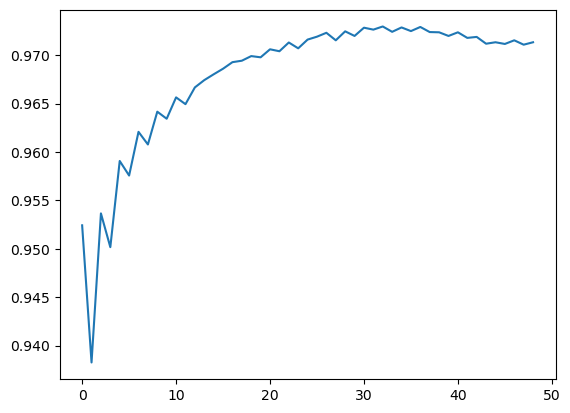

In [117]:
plt.plot(test)

In [82]:
accuracy_score_knn=accuracy_score(y_test,y_pred_knn)
accuracy_score_knn

0.9523940906468685

<AxesSubplot:>

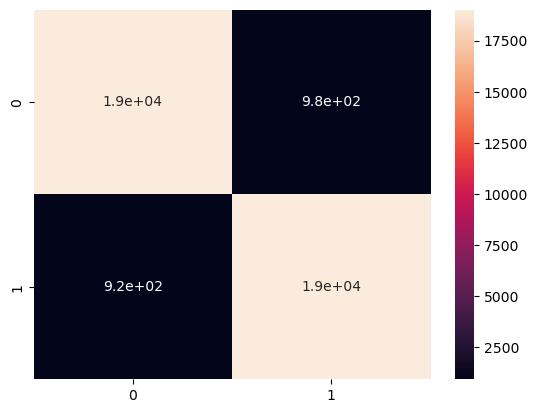

In [83]:
x=confusion_matrix(y_test,y_pred_knn)
import seaborn as sns

sns.heatmap(x, annot=True)

In [84]:
precision_score(y_test,y_pred_knn)

0.9512231727450098

In [85]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators= 100, max_depth= 1000, random_state=42,criterion='gini')
forest.fit(x_train,y_train)
y_pred_forest=forest.predict(x_test)

In [86]:
accuracy_score_forest=accuracy_score(y_test,y_pred_forest)
accuracy_score_forest


0.9848503850109107

<AxesSubplot:>

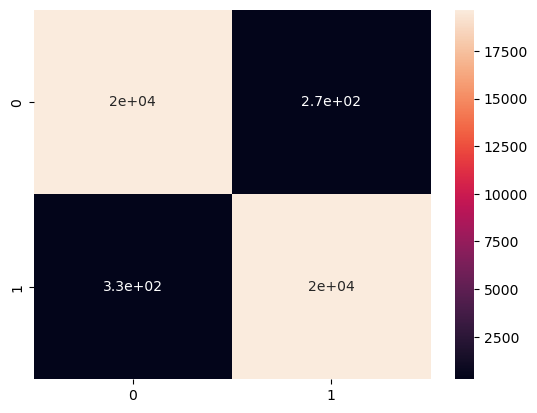

In [87]:
x=confusion_matrix(y_test,y_pred_forest)
import seaborn as sns

sns.heatmap(x, annot=True)

In [88]:
precision_score(y_test,y_pred_forest)

0.9862669148347503

In [89]:
#model de deep learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

#exemple 

deep=Sequential([
    InputLayer(input_shape=(x_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=56, activation='relu'), 
    Dense(units=48, activation='relu'), 
    Dense(units=40, activation='relu'), 
    Dense(units=32, activation='relu'), 
    Dense(units=24, activation='relu'), 
    Dense(units=16, activation='relu'),
    Dense(units=8, activation='relu'), 
    Dense(units=1, activation='sigmoid'),
])


In [ ]:
deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
deep.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2)
y_pred_deep = deep.predict(x_test)
#indices_classes_predites = np.argmax(y_pred_deep, axis=1)
#y_pred = y_pred_deep.round(0).astype(int)
#precision_score(y_test, indices_classes_predites)

In [ ]:
y_pred_deep

In [ ]:
y_test

In [ ]:
x_train.head(3)

In [ ]:
x=pd.DataFrame(y_train)
x


In [ ]:
win_1=(x['winner']==1).sum()

In [ ]:
taux_win_1=(win_1/x.shape[0])
taux_win_1                   # taux supérieur à 30% la donné est balanced.

In [ ]:
from sklearn.linear_model import LogisticRegression as LR 
model_elastic=LR(penalty='elasticnet',solver='saga', l1_ratio=0.7, random_state=42, max_iter=1000)

In [ ]:
model_l1=LR(penalty='l1',solver='saga', random_state=42)

In [ ]:
model_l2=LR(penalty='l2',solver='saga', random_state=42)

In [ ]:
model_elastic.fit(x_train,y_train)

In [ ]:
y_pred_elastic=model_elastic.predict(x_test)

In [ ]:
precision_score(y_test,y_pred_elastic)

In [ ]:
model_l1.fit(x_train,y_train)

In [ ]:
y_pred_l1=model_l1.predict(x_test)

In [ ]:
precision_score(y_test,y_pred_l1)

In [ ]:
model_l2.fit(x_train,y_train)

In [ ]:
y_pred_l2=model_l2.predict(x_test)

In [ ]:
precision_score(y_test,y_pred_l2)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'l1_ratio': [0.1,0.2, 0.5, 0.7,0.9]
}


In [ ]:
grid_search = GridSearchCV(model_elastic, param_grid, cv=5, scoring='precision_macro')
grid_search.fit(x_train, y_train)

In [ ]:
best_elastic=LR(penalty='elasticnet',solver='saga', l1_ratio=grid_search.best_params_['l1_ratio'], random_state=42, max_iter=1000)

In [ ]:
best_elastic.fit(x_train,y_train)

In [ ]:
y_pred_elastic=best_elastic.predict(x_test)
precision_score(y_test,y_pred_elastic)

In [ ]:
y_test=np.array(y_test)
y_test.shape

      

In [ ]:
probs = np.array(best_elastic.predict_proba(x_test))        
probs = np.delete(probs, 1, axis=1)
probs

In [ ]:
def custom_predict(X, threshold):
        probs = np.array(best_elastic.predict_proba(X))   
        probs = np.delete(probs, 1, axis=1)
        #probs=(probs[:,0]+probs[:,1])/2
        #probs=np.where(probs >= threshold, 1, 0)
        for i in range(probs.shape[0]):
            if probs[i]>=threshold : 
                probs[i]=1
            elif probs[i]<threshold : 
                probs[i]=0
        return probs
    
    
        #new_preds = custom_predict(X=x_test, threshold=0.5) 

In [ ]:
y_new_preds = custom_predict(X=x_test, threshold=0.51) 
y_new_preds

In [ ]:
accuracy_threshold=accuracy_score(y_test,y_new_preds)
x=confusion_matrix(y_test,y_new_preds)
import seaborn as sns

sns.heatmap(x, annot=True)

In [ ]:
precision_score(y_test,y_new_preds)